# Персептрон и алгоритм обратного распространения ошибки.  

Illustration of the Mark 1 perceptron hardware (1960).

<img src="./imgs/0.png">
The photograph on the left shows how the inputs were obtained using a simple camera system in which an input scene, in this case a printed character, was illuminated by powerful lights, and an image focussed onto a 20 × 20 array of cadmium sulphide photocells, giving a primitive 400 pixel image. 
<img src="./imgs/1.png">
The perceptron also had a patch board, shown in the middle photograph,
which allowed different configurations of input features to be tried. Often these were wired up at random to demonstrate the ability of the perceptron to learn without the need for precise wiring, in contrast to a modern digital computer. 

<img src="./imgs/2.png">
The photograph on the right shows one of the racks of adaptive weights. Each weight was
implemented using a rotary variable resistor, also called a potentiometer, driven by an electric motor thereby
allowing the value of the weight to be adjusted automatically by the learning algorithm.

<img src="./imgs/2.jpg">
The Mark 1 Perceptron (Source: Arvin Calspan Advanced Technology Center; Hecht-Nielsen, R. Neurocomputing (Reading, Mass.: Addison-Wesley, 1990).)



# Однослойный перцептрон

<img src="./imgs/3.png" width=400>

$$
\large
\large OUT(x) = softmax(D_2(\vec{x})) \\
\large D_2(\vec{x}) = \theta_2 + W_2 A_1(\vec{x}) \\
\large A_1(x) = max(0, D_1(\vec{x})) \\
\large D_1(\vec{x}) = \theta_1 + W_1 \vec{x}
$$

Каждая сеть представима в виде акцикличного графа вычислений над тензорами. **Тензор** - в случае нейронных сетей это просто многомерный массив. В узлах графа находятся функции, осуществляющие операции. В техминах нейронных сетей вычислительные узлы называют **слоями**. В данной сети есть слои следующих видов:
- dense (D) - полносвязный слой
- max(0,x) - слой нелинейной активации
- softmax - softmax 
- loss - функционал потерь, котороый тоже стоит рассматривать как слой.

Обычно граф вычислений рисуется следующим образом

<img src="./imgs/4.png" width=700>

Так как мы говорим про задачу многоклассовой классификации, то на выходе сети мы ожидаем набор вероятностей $p_i$, такие что $\sum p_j = 1$. Для реализации этого используется softmax слой, физический смысл которого эквивалентен сигмойду в задаче бинарной классификации
$$
\large softmax_i = p_i = \frac{e^{a_i}}{\sum_j e^{a_j}} \\
$$

# Loss функция

Для того, чтобы получить loss функцию для нейронной сети, рассмотрим понятие перекрестной энтропии:
$$
\large H(p, q) = \operatorname{E}_p[-\log q] = H(p) + D_{\mathrm{KL}}(p \| q)=-\sum_x p(x)\log q(x)
$$
где $D_{\mathrm{KL}}(p||q)$ - расстояние Ку́льбака—Ле́йблера
$$
\large D_{\mathrm{KL}}(p||q)=\sum \limits _{i=1}^{n}p_{i}\log {\frac {p_{i}}{q_{i}}}
$$
Значение этого функционала можно понимать как количество неучтённой информации распределения $P$, если $Q$ было использовано для приближения $P$.

Можно показать, что оптимизация кросс-энтропии в задаче многоклассовой оптимизации эквивалентно оптимизации правдоподобия.  Таким образом, loss для нашей сети будет:
$$
\large L = -\sum_i y_i \log \hat{y}_i
$$

# Концепция автоматического дифференцирования

Давайте переместимся в слайды )
<img src="./imgs/5.png" width=700>

# Обучаем персептрон

Задача: нужно реализовать двухслойный персептрон и обучить его на наборе MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### TODO: Полносвязный слой

In [2]:
class Dense:
    def __init__(self, in_size, out_size):
        np.random.seed(1)
        self.W = np.random.normal(scale=0.1, size=(out_size, in_size))
        self.b = np.random.normal(scale=0.1, size=(out_size))
        
    def forward(self, x):
        self.x = x # запоминаем для обратного прохода
        return np.dot(self.W, x) + self.b
    
    def backward(self, dz, lr=0.001):
        # вычисляем градиенты по параметрам (запоминаем их для отладки)
        self.dW = np.outer(dz, self.x)
        self.db = dz
        # вычисляем производную по входу
        self.dx = np.matmul(dz, self.W) 
        # обновляем веса
        self.W = self.W - lr * self.dW
        self.b = self.b - lr * self.db
        # возвращаем dx для продолжения алгоритма
        return self.dx

Проверяем используя пример из слайдов

In [3]:
d = Dense(2, 2)
x = np.array([0.2, 0.4])
d.W = np.array([[0.1, 0.5], [-0.3, 0.8]])
d.b = np.array([1, 0.5])
dz = np.array([0.44, 0.52])

z = d.forward(x)
z_orig = np.array([1.22, 0.76])
print('z = ',z, 'must be', z_orig, 'diff = ', z-z_orig)

dx = d.backward(dz)
dx_orig = np.array([-0.112, 0.636])
print('dx = ', dx, 'must be', dx_orig, 'diff = ', dx-dx_orig)

print('W\n', d.W)
print('dW:\n', d.dW)
print('db:\n', d.db)
print('dx:\n', d.dx)

z =  [ 1.22  0.76] must be [ 1.22  0.76] diff =  [ 0.  0.]
dx =  [-0.112  0.636] must be [-0.112  0.636] diff =  [  1.38777878e-17   0.00000000e+00]
W
 [[ 0.099912  0.499824]
 [-0.300104  0.799792]]
dW:
 [[ 0.088  0.176]
 [ 0.104  0.208]]
db:
 [ 0.44  0.52]
dx:
 [-0.112  0.636]


В слайдах у нас вход и выход слоя имеют одинаковую размерность. Давайте проверим, что для разных размеров все считается правильно.

In [4]:
# Проверяем, что размерности соблюдаются правильно
d = Dense(3, 2)
x = np.array([0.1, 0.2, 0.3])
r = d.forward(x)
print(r.shape, 'must be', (2,))
dz = np.array([0.4, 0.5])
dz = d.backward(dz)
print(dz.shape, 'must be', (3,))

(2,) must be (2,)
(3,) must be (3,)


### Нелинейная функция активации: ReLu

$$
ReLu = max(0, Dense(x))
$$

In [5]:
class Max:
    
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, dz, lr=0.1):
        dz[self.x < 0] = 0
        return dz

### Softmax

Бонус-треком можете реализовать вычисление softmax слоя

$$
\frac {\partial }{\partial x_{k}}\sigma_i (x) =\sigma_i (x)(\delta _{ik}-\sigma_k (x))
$$
где $\delta _{ik}$ это дельта Кронекера
$$
\delta _{{ij}}={\begin{cases}0&{\text{if }}i\neq j,\\1&{\text{if }}i=j.\end{cases}}
$$

In [6]:
class Softmax:
    
    def forward(self, x):
        self.x = x
        exps = np.exp(x)
        return exps / np.sum(exps)
    
    def backward(self, dz, lr=0.001):
        sm = self.forward(self.x)
        self.lp = (np.eye(sm.shape[0], sm.shape[0]) - sm).T
        self.lp2 = sm * self.lp
        return np.dot(dz, self.lp2)

In [7]:
# Код для проверки
x = np.array([0.001, -0.001])
s = Softmax()
sm = s.forward(x)
print(sm)
dz = np.array([0, -2.])
print('dz', s.backward(dz))
print(s.lp)
print(s.lp2)

[ 0.5005  0.4995]
dz [ 0.4999995 -0.4999995]
[[ 0.4995 -0.5005]
 [-0.4995  0.5005]]
[[ 0.24999975 -0.24999975]
 [-0.24999975  0.24999975]]


### TODO Loss: кросс-энтропия

Напомню, кросс-энтропия выражается как
$$
L = -\sum_i y_i \log \hat{y}_i
$$

Градиент вычисляется следующим образом:
$$
\frac {\partial }{\partial \hat{y}_{i}} L = -\frac{y_i}{\hat{y}_i}
$$

In [8]:
class CrossEntropy:
    
    def forward(self, y_true, y_hat):
        self.y_true = y_true
        self.y_hat = y_hat
        return -np.sum( y_true * np.log(y_hat))
    
    def backward(self, dz, lr=0.001):
        return dz * -1. * self.y_true / self.y_hat

# Тест 0 - самая тупая сеть

Строим функцию $f(x)=x$

In [9]:
X = np.array([[1., 0],
              [0,  1.]])
Y = np.array([[1., 0],
              [0,  1.]])

In [10]:
class IdentityNet:
    
    def __init__(self):
        self.d = Dense(2, 2)
        self.s = Softmax()
        
    def forward(self, x):
        self.x = x
        net = self.d.forward(x)
        net = self.s.forward(net)
        return net
    
    def backward(self, dz, lr=0.001):
        dz = self.s.backward(dz, lr)
        dz = self.d.backward(dz, lr)
        return dz

In [11]:
net = IdentityNet()
L_iter = []

[ 0.94888401  0.05111599] [ 0.05042811  0.94957189]


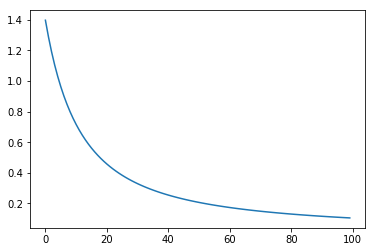

In [12]:
# Инициализируем loss, его удобнее хранить в теле обучения
loss = CrossEntropy() 
lr = 0.1 # скорость обучения
for iter in range(100): # эпохи = полный проход по датасету
    L_acc = 0.
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]
        y_h = net.forward(x)
        L = loss.forward(y, y_h)
        L_acc += L
        dz = loss.backward(1, lr)
        net.backward(dz, lr)
    L_iter.append(L_acc) # коллекционируем loss
plt.plot(L_iter) # посмотрим на кривую обучения
print( net.forward(X[0]), net.forward(X[1])) # проверим глазами, что обучились

# Тест 1 - XOR

<img src="./imgs/10.png" width=200>

In [13]:
X = np.array([[-1, -1],
              [1, -1],
              [-1, 1],
              [1, 1]], dtype='float')

Y = np.array([[1, 0],
              [0, 1],
              [0, 1],
              [1, 0]], dtype='float')


In [14]:
class XorNet:
    
    def __init__(self):
        self.d1 = Dense(2, 3)
        self.a1 = Max()
        self.d2 = Dense(3, 2)
        self.sm = Softmax()
        
    def forward(self, x):
        net = self.d1.forward(x)
        net = self.a1.forward(net)
        net = self.d2.forward(net)
        net = self.sm.forward(net)
        self.net = net
        return net
    
    def backward(self, dz, lr=0.1):
        dz = self.sm.backward(dz, lr)
        dz = self.d2.backward(dz, lr)
        dz = self.a1.backward(dz, lr)
        dz = self.d1.backward(dz, lr)
        return dz
        

In [15]:
net = XorNet()

[ 0.97747805  0.02252195] [ 1.  0.]
[ 0.12850581  0.87149419] [ 0.  1.]
[ 0.12670141  0.87329859] [ 0.  1.]
[ 0.96022863  0.03977137] [ 1.  0.]


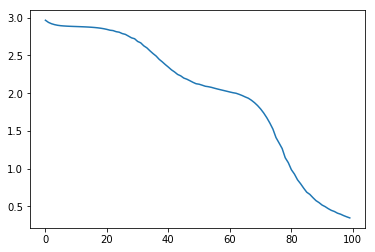

In [16]:
loss = CrossEntropy()
lr = 0.1
L_iter = []
for iter in range(100):
    L_acc = 0.
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]
        y_h = net.forward(x)
        L = loss.forward(y, y_h)
        L_acc += L
        dz = loss.backward(1, lr)
        dz = net.backward(dz, lr)
    L_iter.append(L_acc)
plt.plot(L_iter)
for i in range(4):
    print(net.forward(X[i]), Y[i])

# Тест 3 - MNIST

In [17]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')
X = mnist['data']
print(X.shape)

(70000, 784)


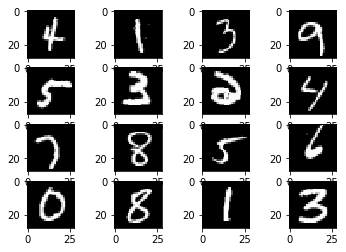

In [18]:
n=4
for i in range(n*n):
    plt.subplot(n,n,i+1)
    I = X[np.random.randint(0, X.shape[0]),:]
    I = I.reshape((28, 28))
    plt.imshow(I, cmap='gray')

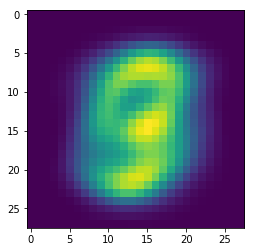

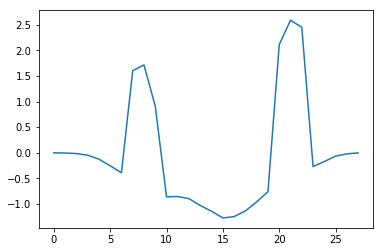

In [19]:
X = X.astype('float')
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
X=(X - Xm) / (Xs + 0.0001)
plt.imshow(Xm.reshape((28, 28)))
plt.figure()
plt.plot(X[0].reshape((28, 28))[14])

In [20]:
from sklearn.preprocessing import OneHotEncoder

Y = mnist['target']
print('original', Y)
t = OneHotEncoder(sparse=False)
Y = t.fit_transform(Y.reshape(-1, 1))
print('one hot', Y)

original [ 0.  0.  0. ...,  9.  9.  9.]
one hot [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [21]:
class MnistNet:
    
    def __init__(self):
        self.d = Dense(784, 10)
        self.s = Softmax()
        
    def forward(self, x):
        net = self.d.forward(x)
        net = self.s.forward(net)
        return net
    
    def backward(self, dz, lr):
        dz = self.s.backward(dz, lr)
        dz = self.d.backward(dz, lr)
        return dz

In [22]:
net = MnistNet()

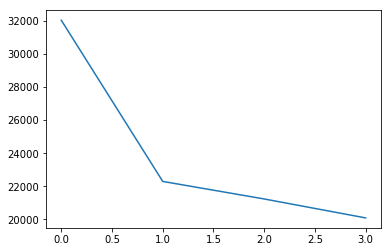

In [23]:
loss = CrossEntropy()
lr = 0.001
L_iter = []
for iter in range(4):
    L_acc = 0.
    sh = list(range(X.shape[0])) # больше рандома богу рандома
    np.random.shuffle(sh)
    for i in range(X.shape[0]):
        x = X[sh[i]]
        y = Y[sh[i]]
        y_h = net.forward(x)
        L = loss.forward(y, y_h)
        L_acc += L
        dz = loss.backward(1, lr)
        dz = net.backward(dz, lr)
        
    L_iter.append(L_acc)
plt.plot(L_iter)

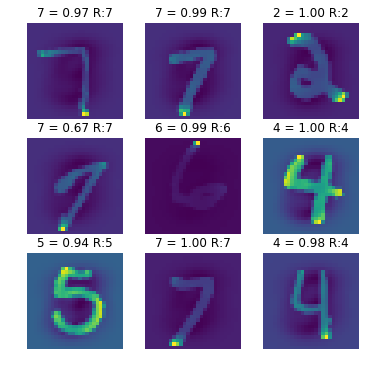

In [24]:
plt.figure(figsize=(6,6))

sh = list(range(X.shape[0]))
np.random.shuffle(sh)

n = 3
for i in range(n*n):
    ax = plt.subplot(n, n, i+1)

    j = sh[i]
    R = np.argmax(Y[j])
    P = net.forward(X[j])
    Rp = np.argmax(P)

    ax.set_title('%s = %.2f R:%s' % (Rp, P[Rp], R))
    ax.set_axis_off()
    plt.imshow(X[j].reshape((28, 28)))


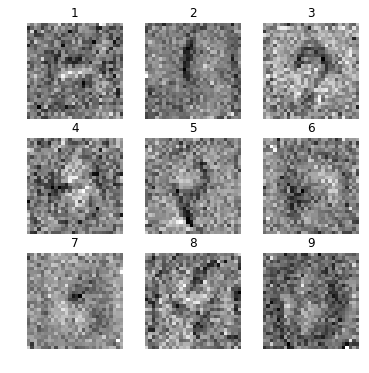

In [25]:
plt.figure(figsize=(6,6))

n = 3
for i in range(1, 10):
    ax = plt.subplot(n, n, i)
    ax.set_title('%s' % i)
    ax.set_axis_off()
    plt.imshow( net.d.W[i].reshape((28, 28)).T, cmap='gray' )

# Pytorch. Autograd.

Переходим в другой ноутбук.

# Органическая нейронная сеть

## Нейрон
<img src="./imgs/7.jpg">

## Миниколонка кортекса
- 80-160 нейронов
- 6 слоев
- четкая структура
<img src="./imgs/8.jpg">
<img src="./imgs/9.jpg">

## Коннектом
<img src="./imgs/11.png">

## Импульсная модуляция

<img src="./imgs/12.jpg">

<img src="./imgs/12.png" width=300>

In [26]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Cw5PKV9Rj3o?rel=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# Чеклист

- устройство многослойного персептрона
- слои: полносвязный, ReLu, Softmax, CrossEntropy
- chain rule
- правило дифференцирования сложной функции
- алгоритм обратного распространения ошибки
- почему при обучении сеть потребляет больше памяти, чем при выводе

# Почитать

Backprop: лекция в cs231n
- почитать: http://cs231n.github.io/optimization-2/
- посмотреть: https://www.youtube.com/watch?v=d14TUNcbn1k

Устройство мозга
- медицина: https://www.coursera.org/learn/medical-neuroscience
- информатика: https://www.coursera.org/learn/computational-neuroscience

Нейроморфные процессоры
- IBM SyNAPSE chip: http://research.ibm.com/cognitive-computing/neurosynaptic-chips.shtml